This notebook simply loads all data and create a random sample from it year by year for mannual coding of the target labels and the sentiment analysis later.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Check data shape and column names


Use data received in Oct 2023.

### Sample for mannual coding - first batch (120 + 1080*2)

In [ ]:
import pandas as pd
import numpy as np

years = range(2008,2020)
for year in years:
  df =  pd.read_csv('/content/drive/MyDrive/Capstone/Data/Old/' + str(year) + '.csv', lineterminator='\n', index_col = 0, low_memory = False)
  #print(year, df.shape)
  print(year, df.shape, len(df['id'].unique()))   # id:unique id of each comment, same as the length of the dataframe

2008 (6673, 34) 6673
2009 (56949, 34) 56949
2010 (238782, 34) 238782
2011 (405079, 34) 405079
2012 (586461, 34) 586461
2013 (622124, 34) 622124
2014 (892109, 34) 892109
2015 (1170584, 34) 1170584
2016 (1536368, 34) 1536368
2017 (1836383, 34) 1820876
2018 (1942173, 34) 1942162
2019 (1781448, 34) 1781448


Sample labeld by ``index`` (better use ``id``).

In [ ]:
def sample_create(seed_no, post_no_per_year):

  import pandas as pd
  import numpy as np
  import random
  from random import sample

  results = pd.DataFrame()
  years = range(2008,2020)

  for year in years:
    df =  pd.read_csv('/content/drive/MyDrive/Capstone/Data/Old/' + str(year) + '.csv', lineterminator='\n', index_col = 0, low_memory = False)
    df = df.loc[(df['body'] != '[deleted]') & (df['body'] != '[removed]') & (~df['body'].str.contains('This post has been removed', regex=False, na=False)),]      # remove deleted text/post
    random.seed(seed_no)
    ind = sample(list(df.index), post_no_per_year)
    samp = df.loc[ind].reset_index()
    results = pd.concat([results, samp], ignore_index = True)

  results['year'] = np.repeat(list(years), post_no_per_year)  # add a new column year

  return results

In [ ]:
df0 = sample_create(100, 10)     # pilot study for inter-code reliability
df1_c1 = sample_create(10, 90)   # for first coder (rz)
df1_c2 = sample_create(20, 90)   # for second coder (zj)

In [ ]:
df0.to_excel('/content/drive/MyDrive/Capstone/Labeled/df0.xlsx', index = False) # pilot study
df1_c1.to_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c1.xlsx', index = False) # coder1
df1_c2.to_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c2.xlsx', index = False) # coder2

### Second batch, get 1100 posts more.

In [ ]:
def sample_create2(seed_no, post_no_per_year):
  import pandas as pd
  import numpy as np
  import random
  from random import sample

  results = pd.DataFrame()
  years = range(2009,2020)

  for year in years:
    df =  pd.read_csv('/content/drive/MyDrive/Capstone/Data/Old/' + str(year) + '.csv', lineterminator='\n', index_col = 0, low_memory = False)
    df = df.loc[(df['body'] != '[deleted]') & (df['body'] != '[removed]') & (~df['body'].str.contains('This post has been removed', regex=False, na=False)),]      # remove deleted text/post
    df = df.loc[[type(x) == str for x in df['body']],]    # remove body values == NaN (float, starting from 2012)

    df['tokens'] = df['body'].str.split(' ')
    df['len'] = [len(x) for x in df['tokens']]
    df = df.loc[df['len'] >= 15,]             # keep longer posts in 2nd batch
    df = df.drop(columns=['tokens', 'len'])

    random.seed(seed_no)
    ind = sample(list(df.index), post_no_per_year)
    samp = df.loc[ind].reset_index()
    results = pd.concat([results, samp], ignore_index = True)

  results['year'] = np.repeat(list(years), post_no_per_year)  # add a new column year

  return results

In [ ]:
df2_c1 = sample_create2(999, 50)
df2_c2 = sample_create2(2023, 50)

df2_c1.to_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c1.xlsx', index = False) #rz
df2_c2.to_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c2.xlsx', index = False) #zj

### Check difference between batch 1 & 2

In [ ]:
# check difference between batch 1 and 2
import pandas as pd

df0 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df0.xlsx')
df1_c1= pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c1.xlsx')
df1_c2= pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c2.xlsx')
batch1= pd.concat([df0,df1_c1,df1_c2], ignore_index = True)

df2_c1 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c1.xlsx')
df2_c2 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c2.xlsx')
batch2= pd.concat([df2_c1,df2_c2], ignore_index = True)

years = range(2009,2020)
for year in years:
  ind1 = set(batch2.loc[batch2['year']==year,'id'])
  ind2 = set(batch1.loc[batch1['year']==year,'id'])
  print(year, ind1.intersection(ind2))    # only 1 overlap, let it go

2009 set()
2010 set()
2011 set()
2012 set()
2013 set()
2014 set()
2015 {'cpedmif'}
2016 set()
2017 set()
2018 set()
2019 set()


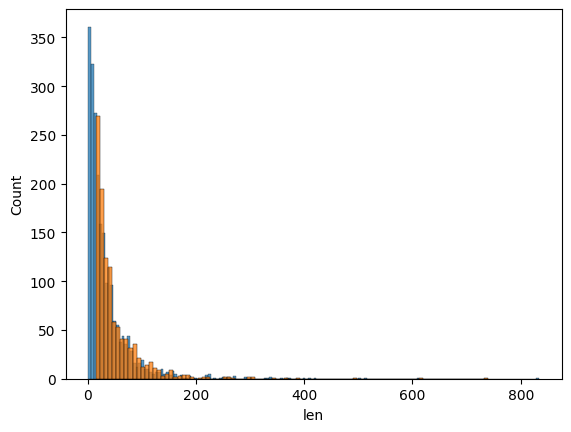

In [ ]:
import pandas as pd

batch1['tokens'] = batch1['body'].str.split(' ')
batch1['len'] = [len(x) for x in batch1['tokens']]

batch2['tokens'] = batch2['body'].str.split(' ')
batch2['len'] = [len(x) for x in batch2['tokens']]

import seaborn as sns
sns.histplot(x = "len", data = batch1)
sns.histplot(x = "len", data = batch2);

In [ ]:
import numpy as np

np.mean(batch1['len']), np.median(batch1['len']), np.mean(batch2['len']), np.median(batch2['len'])

(35.94824561403509, 21.0, 51.75363636363636, 35.0)

### Create a combined file for all

In [ ]:
# get all labeled data (full columns without labeling)
df0 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df0.xlsx')
df1_c1 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c1.xlsx')
df1_c2 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df1_c2.xlsx')
df2_c1 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c1.xlsx')
df2_c2 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df2_c2.xlsx')

df = pd.concat([df0,df1_c1,df1_c2,df2_c1,df2_c2], ignore_index = True)                 # total: 3380
#df.to_excel('/content/drive/MyDrive/Capstone/Labeled/df_combined.xlsx',index = False)

display(df.shape, df.columns)

(3380, 36)

Index(['index', 'subreddit', 'subreddit_id', 'subreddit_type', 'author',
       'body', 'created_date', 'created_utc', 'retrieved_on', 'id',
       'parent_id', 'link_id', 'score', 'total_awards_received',
       'controversiality', 'gilded', 'collapsed_because_crowd_control',
       'collapsed_reason', 'distinguished', 'removal_reason',
       'author_created_utc', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'can_gild', 'can_mod_post', 'collapsed',
       'is_submitter', '_edited', 'locked', 'quarantined', 'no_follow',
       'send_replies', 'stickied', 'author_flair_text', 'year'],
      dtype='object')

### Screen labeled post

Remove labeled posts NOT from the two subreddit: apple, iphone.

- For coder's convenience, the labeled data files only include four columns: 'year', 'index', 'body' and 'sentiment label'.

- Let's first remove posts from the original sample (all columns including 'subreddit') if they are Not from the two subreddits, then "inner" merge it with the labeled data. Note we can only merge by year and index as the labeled data has no ``id`` column.

Both files come from old .csv files, originally of the same length (3380).



In [ ]:
# first, remove data NOT from the two subreddits.

df = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/df_combined.xlsx')
df_sub = df[df['subreddit'].isin(['apple','iphone'])]
df_sub.shape

(3356, 36)

In [ ]:
import pandas as pd

labeled0 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/reddit_comments120_coder2.xlsx')     # zj - (120, 4)
labeled1 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/reddit_comments1080_coder1.xlsx')    # rz - (1080,4)
labeled2 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/reddit_comments1080_coder2.xlsx')    # zj - (1080,4)
labeled3 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/reddit_comments550_coder1.xlsx')     # rz - (550, 4)
labeled4 = pd.read_excel('/content/drive/MyDrive/Capstone/Labeled/reddit_comments550_coder2.xlsx')     # zj - (550, 4)

labeled = pd.concat([labeled0,labeled1,labeled2,labeled3,labeled4], ignore_index = True)                # total: 3380
labeled.to_excel('/content/drive/MyDrive/Capstone/Labeled/labeled2008-2019_all.xlsx', index = False)
labeled.shape

(3380, 4)

In [ ]:
# merge by year and index, remove duplicate

sub = pd.merge(df_sub, labeled, on = ['year','index'], how ='left')
sub = sub[~sub.duplicated(subset=['year','index'])]     # 3 duplicate
sub = sub.drop(columns=['body_y'])
sub = sub.rename(columns={"body_x": "body"})
sub.to_excel('/content/drive/MyDrive/Capstone/Labeled/labeled2008-2009.xlsx', index = False)
sub.shape

(3355, 37)